# **Regresión**

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## **Datos**

In [5]:
df = pd.read_csv('Datos/housing.csv')

In [6]:
wf = df.dropna()

In [7]:
X = wf.drop('MEDV', axis=1)
y = wf['MEDV']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## **Regresión Lineal**

In [9]:
regLin = LinearRegression()
regLin.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = regLin.predict(X_test)

In [11]:
print(f'La presición del modelo es de: {round(regLin.score(X_test, y_test),2)*100}%')

La presición del modelo es de: 84.0%


## **Cross Validation**

In [12]:
cv_results = cross_val_score(regLin, X, y, cv=5)

In [13]:
np.mean(cv_results), np.median(cv_results)

(0.3839530761206411, 0.5857182044566904)

## **Ridge Regression**

In [14]:
regRidge = Ridge(alpha=0.1)

In [15]:
regRidge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [16]:
ridgePred = regRidge.predict(X_test)

In [17]:
regRidge.score(X_test, y_test)

0.8436705452472808

## **Lasso Regression**

In [18]:
regLasso = Lasso(alpha=0.1)

In [19]:
regLasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [20]:
lassoPred = regLasso.predict(X_test)

In [21]:
regLasso.score(X_test, y_test)

0.8350194361647676

In [22]:
names = X.columns

In [45]:
coefs = pd.DataFrame(regLasso.coef_, names).reset_index()
coefs.columns = ['Variable', 'Coeficiente']
coefs

,Variable,Coeficiente
0,CRIM,-0.097750
1,ZN,0.059489
2,INDUS,-0.039976
3,CHAS,1.675928
4,NOX,-0.000000
5,RM,3.667858
6,AGE,-0.021209
7,DIS,-1.226414
8,RAD,0.243828
9,TAX,-0.016231


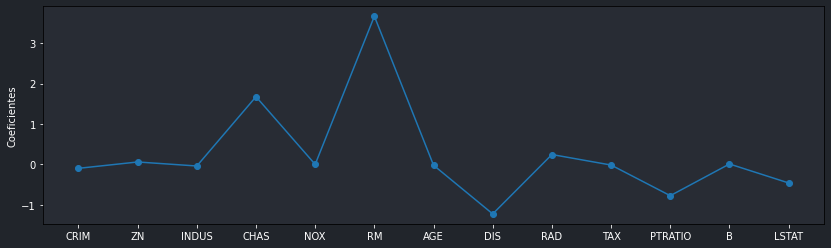

In [36]:
fig, ax = plt.subplots(figsize=(14, 4))
fig.patch.set_facecolor('#21252b')

ax.set_facecolor('#282c34')

plt.plot(range(len(names)), regLasso.coef_)
plt.scatter(range(len(names)), regLasso.coef_)

plt.xticks(range(len(names)), names, color='white')
plt.yticks(color='white')

plt.ylabel('Coeficientes', color='white')

ax.tick_params(axis='x', labelcolor='white', color='white')
ax.tick_params(axis='y', labelcolor='white', color='white')

plt.show()